## Import Relevant Modules

In [2]:
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Specify all relevant constants

In [3]:
kbt=2.494339
minS=1
maxS=114
nbin=20
block_size = 10

In [4]:
data=pd.read_csv("COLVAR",sep="\s+", header=None, skiprows=1,usecols=[1,2,3]) 
data.columns=['s(R)','z(R)','bias']
data['s(R)']=data['s(R)'].round(2)

## Calculate Maximum bias

In [5]:
bmax=data['bias'].max()

## Normalize s(R)

In [6]:
data['norm s(R)']=(data['s(R)']-minS)/(maxS-minS)
data

,s(R),z(R),bias,norm s(R)
0,1.90,0.011533,149.325585,0.007965
1,1.82,0.011707,148.022618,0.007257
2,1.72,0.012545,147.008204,0.006372
3,1.93,0.009537,143.402185,0.008230
4,1.82,0.009520,141.415963,0.007257
...,...,...,...,...
13329,90.42,0.026455,199.897369,0.791327
13330,92.33,0.025622,198.335748,0.808230
13331,94.45,0.024892,194.978573,0.826991
13332,95.89,0.025026,192.737358,0.839735


# Calculate Boltzmann weights

In [7]:
data['weights']=np.exp((data['bias']-bmax)/kbt)
data.to_csv("sR.weight",index=False,sep="\t",columns=['s(R)','weights'])

## Calculate Free energy and make min-to-zero

In [8]:
data['energy']=-data['bias'] # free-energy is negative of bias potential
min_energy=data['energy'].min() # minimum bias
data['energy']=data['energy']-min_energy # make minimum bias zero

In [9]:
nblocks = int(len(data)/block_size)
nblocks

1333

## Binning of data using cut: Create 20 equal-sized bins

In [10]:
data['bins']=pd.cut(data['norm s(R)'], bins=nbin)
data

,s(R),z(R),bias,norm s(R),weights,energy,bins
0,1.90,0.011533,149.325585,0.007965,3.688909e-12,65.665196,"(-0.000624, 0.0493]"
1,1.82,0.011707,148.022618,0.007257,2.187942e-12,66.968163,"(-0.000624, 0.0493]"
2,1.72,0.012545,147.008204,0.006372,1.456847e-12,67.982577,"(-0.000624, 0.0493]"
3,1.93,0.009537,143.402185,0.008230,3.432121e-13,71.588596,"(-0.000624, 0.0493]"
4,1.82,0.009520,141.415963,0.007257,1.547881e-13,73.574818,"(-0.000624, 0.0493]"
...,...,...,...,...,...,...,...
13329,90.42,0.026455,199.897369,0.791327,2.355348e-03,15.093412,"(0.783, 0.832]"
13330,92.33,0.025622,198.335748,0.808230,1.259384e-03,16.655033,"(0.783, 0.832]"
13331,94.45,0.024892,194.978573,0.826991,3.278185e-04,20.012208,"(0.783, 0.832]"
13332,95.89,0.025026,192.737358,0.839735,1.334784e-04,22.253423,"(0.832, 0.881]"


# Calculate mean with in each bin

In [11]:
data2=data.groupby('bins').mean()
data2

,s(R),z(R),bias,norm s(R),weights,energy
bins,,,,,,
"(-0.000624, 0.0493]",3.748371,0.023935,177.100743,0.024322,3.821997e-02,37.890038
"(0.0493, 0.0982]",9.573776,0.023877,192.028936,0.075874,1.100068e-01,22.961845
"(0.0982, 0.147]",14.964405,0.023164,193.490071,0.123579,2.230354e-01,21.500710
"(0.147, 0.196]",20.219658,0.023835,188.137295,0.170085,7.434070e-02,26.853486
"(0.196, 0.245]",25.675932,0.026264,175.386914,0.218371,1.678700e-03,39.603867
"(0.245, 0.294]",31.212675,0.027855,165.424252,0.267369,7.311611e-05,49.566529
"(0.294, 0.343]",37.100269,0.027501,131.747535,0.319471,6.997684e-11,83.243246
"(0.343, 0.392]",42.198175,0.028128,142.708013,0.364586,3.440095e-06,72.282768
"(0.392, 0.441]",47.612738,0.029916,158.629379,0.412502,8.870041e-05,56.361402


## Plot free energy vs normalized s(R)

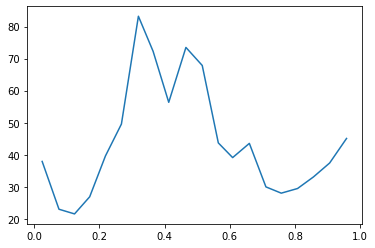

In [12]:
plt.plot(data2['norm s(R)'],data2['energy'])

# Block averaging: Take one block at a time

In [13]:
bin_size = (maxS-minS)/float(nbin-1)
bin_size

5.947368421052632

## Binning the data into bins of uniform width

In [32]:
weight_df=pd.read_csv('sR.weight',sep="\t")
weight_df.columns=['s(R)','weights']
weight_df['bin_index'] = (weight_df['s(R)'] - weight_df['s(R)'].min())/ bin_size 
weight_df['bin_index']=weight_df['bin_index'].apply(round).astype(int)
weight_df

,s(R),weights,bin_index
0,1.90,3.688909e-12,0
1,1.82,2.187942e-12,0
2,1.72,1.456847e-12,0
3,1.93,3.432121e-13,0
4,1.82,1.547881e-13,0
...,...,...,...
13329,90.42,2.355348e-03,15
13330,92.33,1.259384e-03,15
13331,94.45,3.278185e-04,16
13332,95.89,1.334784e-04,16


In [26]:
weightdf=pd.read_csv('sR.weight',sep="\t")
weightdf.columns=['s(R)','weights']
weightdf['bin_index'] = pd.cut(weightdf['s(R)'],bins=20,labels=[i for i in range(20)]) 
weightdf

,s(R),weights,bin_index
0,1.90,3.688909e-12,0
1,1.82,2.187942e-12,0
2,1.72,1.456847e-12,0
3,1.93,3.432121e-13,0
4,1.82,1.547881e-13,0
...,...,...,...
13329,90.42,2.355348e-03,16
13330,92.33,1.259384e-03,16
13331,94.45,3.278185e-04,16
13332,95.89,1.334784e-04,17


In [34]:
bin_list=list(weightdf['bin_index'].unique())
bin_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [47]:
xbar=pd.Series(index=bin_list,dtype=float,data=0)
xbarsq=pd.Series(index=bin_list,dtype=float,data=0)
s_series = pd.Series(dtype=float,data=[(minS + (float(i) * bin_size)) for i in range(len(bin_list))])
xbarsq

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
dtype: float64

In [48]:
for iblock in range(0, nblocks):
    start = iblock * block_size 
    end = start + block_size
    weightcopy=weight_df.copy()
    grp=weightcopy[start:end].groupby('bin_index')
    msum=grp['weights'].sum()/float(block_size)
    ind_list=list(msum.index)
    for ind in ind_list:
        xbar[ind]+=msum[ind]
        xbarsq[ind]+=msum[ind]*msum[ind]

In [49]:
result=pd.DataFrame(columns=['s(R)','W','F'],index=bin_list)
result['s(R)']=s_series
result['n-s(R)']=(result['s(R)']-minS)/(maxS-minS)
result['W']=xbar/nblocks
result['F']=(-kbt * np.log(result['W']))/4.184
result

,s(R),W,F,n-s(R)
0,1.000000,2.200956e-05,6.393254,0.000000
1,6.947368,6.724217e-03,2.982023,0.052632
2,12.894737,1.544994e-02,2.486082,0.105263
3,18.842105,1.088256e-02,2.695003,0.157895
4,24.789474,1.230686e-04,5.367102,0.210526
5,30.736842,6.527599e-06,7.117851,0.263158
6,36.684211,1.383687e-11,14.906230,0.315789
7,42.631579,5.840437e-07,8.556876,0.368421
8,48.578947,2.211075e-06,7.763232,0.421053
9,54.526316,3.400325e-11,14.370209,0.473684


In [50]:
result['<x**2>']= (xbarsq-result['W']**2)/(nblocks-1)
result['sem']=(np.sqrt(result['<x**2>']/nblocks))
result['error']=(kbt/result['W'])*result['sem']
outdf=result[['n-s(R)','F','error']].round(2)
outdf.to_csv(f'fes{block_size}.dat',sep="\t",index=False)